In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump,load




In [12]:
url ='https://raw.githubusercontent.com/digipodium/Datasets/main/50_Startups.csv'
df= pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
state_enc= OneHotEncoder(drop='first')
dummy_state= state_enc.fit_transform(df[['State']]).toarray()
# df.drop(columns=['State'], inplace=True)
df= pd.concat([pd.DataFrame(dummy_state), df], axis = 1)
df.head()

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df.columns=df.columns.astype(str)
X= df.drop(columns=['Profit', 'State'])
y=df['Profit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
scaler= StandardScaler()
x= scaler.fit_transform(X)  # returns numpy array

# Backward Elimination

In [15]:
np.ones((X.shape[0],1)).astype(int)    #creates an array of shape of with 1 as a value

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [16]:
x=np.hstack([np.ones((x.shape[0],1)).astype(int),x])
x

array([[ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.00000000e+00, -6.85994341e-01, -7.17740563e-01,
         1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.00000000e+00, -6.85994341e-01, -7.17740563e-01,
         1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.00000000e+00, -6.85994341e-01,  1.393

In [17]:
x.shape

(50, 6)

In [18]:
from statsmodels.api import OLS

In [19]:
x_opt= x[:,[0,1,2,3,4,5]]
ols= OLS(endog=y, exog=x_opt).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.34e-27
Time:                        15:09:22   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
x1            92.7302   1572.494      0.059      0.953   -3076.424    3261.885
x2           -19.8422   1542.414     -0.013      0.990   -3128.374    3088.690
x3          3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
x4          -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
x5          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df['pred_2']= ols.predict(x_opt)

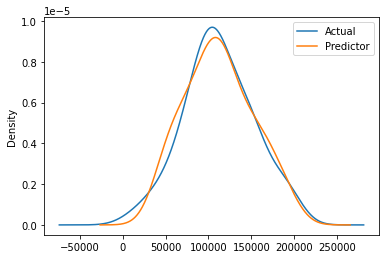

In [23]:
df['Profit'].plot(kind='kde', label= "Actual")
df['pred_2'].plot(kind='kde', label="Predictor")
plt.legend()
plt.show()
